# Popular Data Science Questions

### Stack Exchange
The fact that DSSE is a data science dedicated site (contrarily to the others), coupled with it having a lot of an unanswered questions, makes it an ideal candidate for this investigation. DSSE will be the focus of this guided project.

##### - What kind of questions are welcome on this site?
Questions about machine learning of Python are welcome in [Stack Exchange](https://datascience.stackexchange.com/)

##### - What, other than questions, does the site's home subdivide into?
- Does any of them look useful towards our goal?

Besides questions, it subdivides into `tags`, `users` and `unanswered` which can help readers easily search content.

##### - What information is available in each post?
There're questions, answers and comments which you can explore deeper into your questions.



### Stack Exchange Data Explorer

After a spending some time investigating the website, we decide that the tags will be very useful in categorizing content, saving us the trouble of we having to do it ourself.

Now comes the challenge of accessing the data en masse. One potential solution would be to scrape the site. However, because we still haven't learned how to web scrape, and because we have an easier alternative (mostly the second reason), we're going to do something else.

The gif below shows how we can run the query SELECT * FROM tags;.
![gif](https://dq-content.s3.amazonaws.com/469/run_query.gif)

##### - What tables look more promosing towards finding the most popular content?
The posts table has a lot of columns. We'll be focusing our attention on those that seem relevant towards our goal:

- Id: An identification number for the post.
- PostTypeId: An identification number for the type of post.

![posttypeid](https://dq-content.s3.amazonaws.com/469/PostTypes.png)

- CreationDate: The date and time of creation of the post.
- Score: The post's score.
- ViewCount: How many times the post was viewed.
- Tags: What tags were used.
- AnswerCount: How many answers the question got (only applicable to question posts).
- FavoriteCount: How many times the question was [favored](https://meta.stackexchange.com/questions/53585/how-do-favorite-questions-work) (only applicable to question posts).

##### Run a query against the SEDE DSSE database that extracts the columns listed above for all the questions in 2019. 

SELECT *

FROM Posts

WHERE year(CreationDate) = 2019;

### Exploring the Data

In [1]:
# import required libraries

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the file into a dataframe and explore it
questions_2019 = pd.read_csv("2019_questions.csv", parse_dates = ["CreationDate"])
print(questions_2019.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB
None


In [3]:
questions_2019.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


##### - How many missing values are there in each column? 
7432 missing values in `FavoriteCount`

##### - Can we fix the missing values somehow?
`FavoriteCount` stands for how many times the questions was favored which means only <b>question posts</b> can be favored. We can't remove missing value since it accounts a large scale of data, do we'd fill in the missing values with 0.

##### - Are the types of each column adequate?
`FavoriteCount` s/b integer.

##### - What can we do about the `Tags` column?
We should use str.replace method to remove "><" to clean `Tags` column.

### Cleaning the Data

In [4]:
# fill in the missing values with 0
questions_2019.fillna(value={"FavoriteCount":0}, inplace=True)

# change FavoriteCount column to integer type
questions_2019["FavoriteCount"] = questions_2019["FavoriteCount"].astype(int)

# recheck missing values and types below
questions_2019.dtypes


Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int64
dtype: object

In [5]:
# clean the `Tags` column
# be careful for replace order
questions_2019["Tags"] = questions_2019["Tags"].str.replace("^<|>$","").str.split("><")
questions_2019.head(3)


,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0


### Most Used & Most Viewed

In [6]:
# count how many times each tag was used
tag_count = dict([])

for tags in questions_2019["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1


In [7]:
# We transform it to dataframe for better understanding
tag_count = pd.DataFrame.from_dict(tag_count, orient="index")
tag_count.rename(columns = {0:"Count"}, inplace=True)
tag_count.head(10)

,Count
q-learning,37
non-convex,1
multitask-learning,7
methods,4
linear-algebra,24
feature-extraction,87
convnet,111
dynamic-programming,3
parquet,1
mse,8


In [8]:
# Count how many times each tag was used
most_used = tag_count.sort_values(by="Count", ascending=False).head(20)
most_used.head(6)

,Count
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685


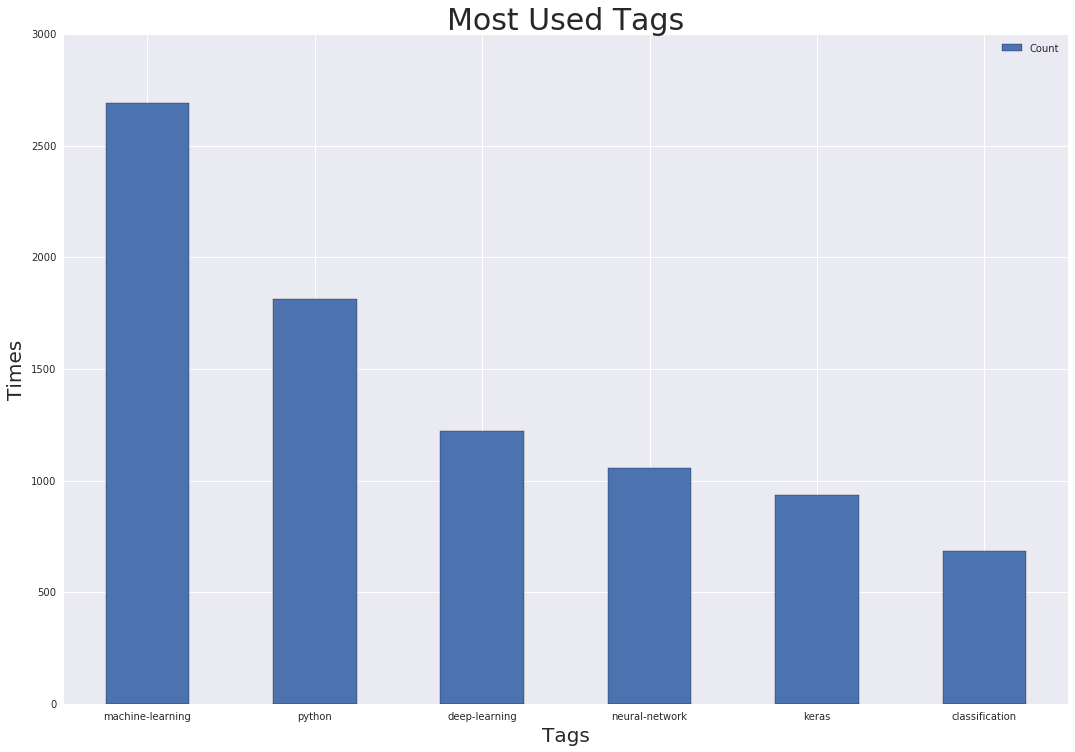

In [46]:
# make a bar plot of first 6 of most used tags
most_used.head(6).plot(kind="bar", figsize=(18,12), rot=0)
plt.xlabel("Tags", size=20)
plt.ylabel("Times", size=20)
plt.title("Most Used Tags", size=30)
plt.show()

We can find from table that `machine learning`, `python`, `deep learning` are the most used tags, but the amount of tags rapidly decline. We can make bar plots for better understanding.

Some tags are too broad to be useful; eg.: python, dataset and r, we'll investgate them deeper in the future.

Let's repeat actions for most reviewed tags.

In [10]:
# Let's refresh the method of `enumerate()`
list = "Enumerate this!"
for i,c in enumerate(list):
    print(i,c)

0 E
1 n
2 u
3 m
4 e
5 r
6 a
7 t
8 e
9  
10 t
11 h
12 i
13 s
14 !


In [63]:
# Count how many times each tags was viewed
tags_view_count=dict()

for idx, tags in enumerate(questions_2019["Tags"]):
    for tag in tags:
        if tag in tags_view_count:
            tags_view_count[tag] += questions_2019["ViewCount"].iloc[idx]
        else:
            tags_view_count[tag] = questions_2019["ViewCount"].iloc[idx]
            
tag_view_count = pd.DataFrame.from_dict(tags_view_count, orient="index")
tag_view_count.rename(columns={0:"ViewCount"}, inplace=True)


In [65]:
most_viewed = tag_view_count.sort_values(by="ViewCount", ascending=False).head(20)
most_viewed.head(6)

,ViewCount
python,537585
machine-learning,388499
keras,268608
deep-learning,233628
pandas,201787
neural-network,185367


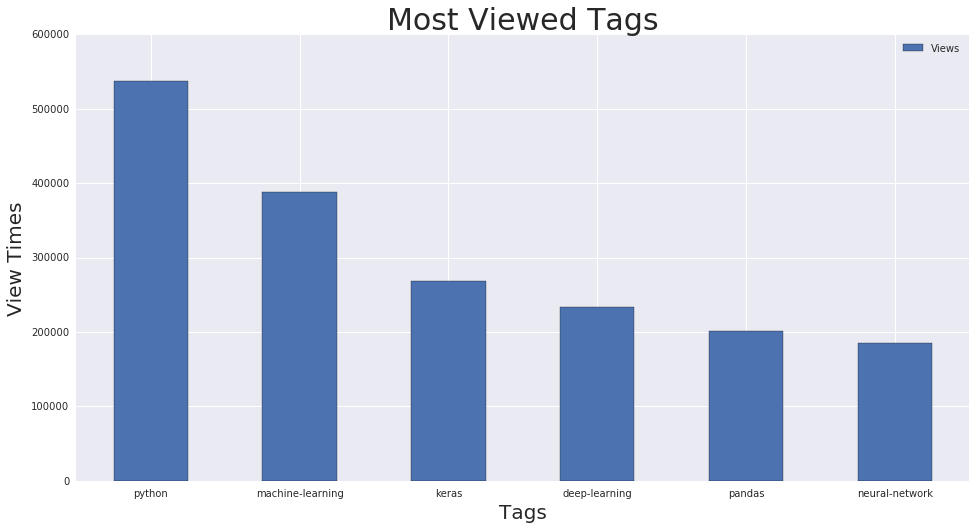

In [48]:
# make a bar plot of first 6 of most viewed tags
most_viewed.head(6).plot(kind="bar", figsize=(16,8),rot=0)
plt.xlabel("Tags", size=20)
plt.ylabel("View Times", size=20)
plt.title("Most Viewed Tags",size=30)
plt.show()

Most viewed tags are now `python`, `machine-learning` and `keras` which is a little different from previous questions.

Let's see both plots side by side!

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f1c49f828>],
      dtype=object)

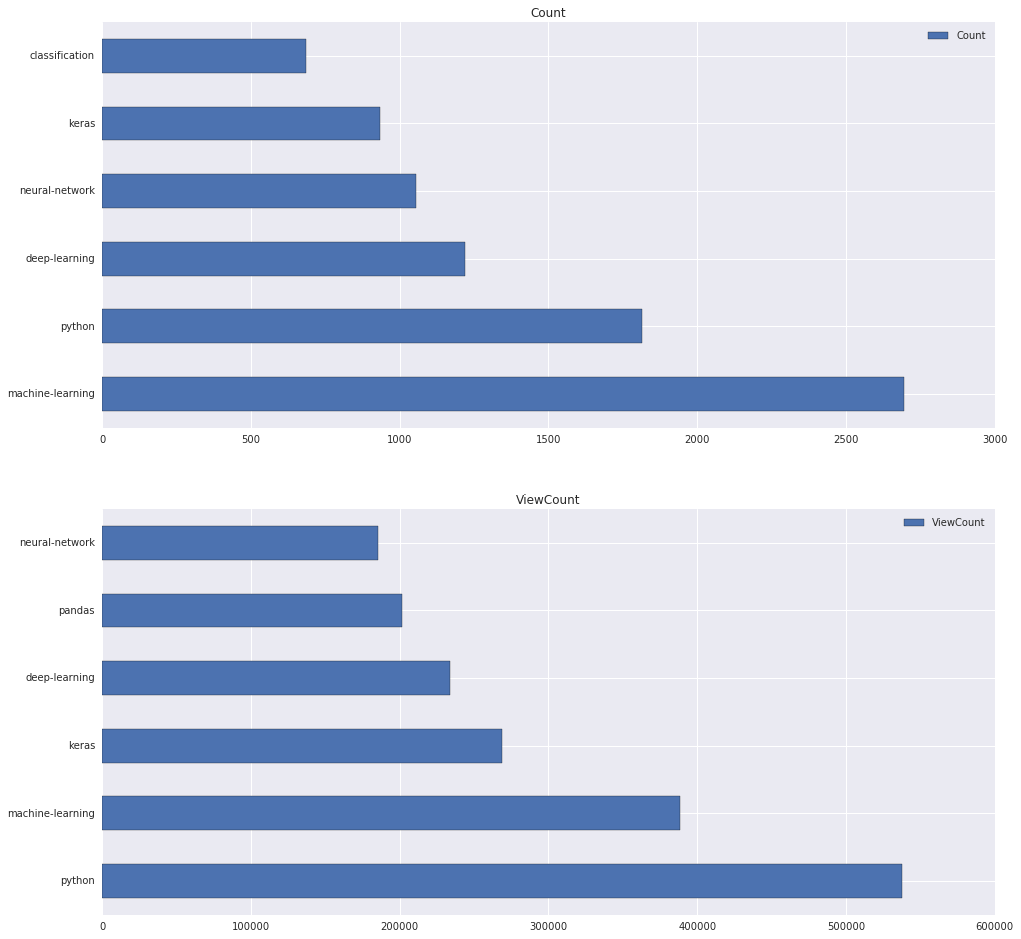

In [66]:
# put both plots together to compare with each other
fig, axes = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches((16,16))
most_used.head(6).plot(kind="barh", ax=axes[0], subplots=True)
most_viewed.head(6).plot(kind="barh", ax=axes[1], subplots=True)


### Relations Between Tags

In [67]:
# See what tags are in `most_used` but not in `most_viewed`
in_used = pd.merge(left=most_used, right = most_viewed, how="left",
                   left_index=True, right_index=True)
in_used

,Count,ViewCount
machine-learning,2693,388499.0
python,1814,537585.0
deep-learning,1220,233628.0
neural-network,1055,185367.0
keras,935,268608.0
classification,685,104457.0
tensorflow,584,121369.0
scikit-learn,540,128110.0
nlp,493,71382.0
cnn,489,70349.0


The tags present in `most_used` but not in `most_viewed` are:
- machine-learning-model
- statistics
- predictive-modeling
- r

In [61]:
# See what tags are in `most_viewed` but not in `most_used`
in_view = pd.merge(left=most_used, right=most_viewed, how="right", 
                   left_index=True, right_index=True)
in_view

,Count,Views
python,1814.0,537585
machine-learning,2693.0,388499
keras,935.0,268608
deep-learning,1220.0,233628
pandas,354.0,201787
neural-network,1055.0,185367
scikit-learn,540.0,128110
tensorflow,584.0,121369
classification,685.0,104457
dataframe,NaN,89352


The tags presented in `most_viewed` but not in `most_used` are:
- dataframe
- numpy
- prtorch
- csv

### Relations between tags

In [72]:
all_tags = tag_count.index
all_tags

Index(['q-learning', 'non-convex', 'multitask-learning', 'methods',
       'linear-algebra', 'feature-extraction', 'convnet',
       'dynamic-programming', 'parquet', 'mse',
       ...
       'marginal-effects', 'wolfram-language', 'arima', 'pathfinder',
       'statsmodels', 'scala', 'bigdata', 'auc', 'relational-dbms',
       'open-source'],
      dtype='object', length=526)

In [74]:
# create a table which index & column are the same
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:4,0:4]

,q-learning,non-convex,multitask-learning,methods
q-learning,NaN,NaN,NaN,NaN
non-convex,NaN,NaN,NaN,NaN
multitask-learning,NaN,NaN,NaN,NaN
methods,NaN,NaN,NaN,NaN


In [19]:
# replace null values with 0
associations.fillna(0,inplace=True)

for tags in questions_2019["Tags"]:
    associations.loc[tags,tags] += 1

In [20]:
relations_most_used = associations.loc[most_used.index, most_used.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,time-series,lstm,pandas,regression,dataset,r,predictive-modeling,clustering,statistics,machine-learning-model
machine-learning,2693,499,429,366,195,259,106,188,113,124,131,71,62,119,99,63,123,61,89,139
python,499,1814,160,137,280,98,167,235,71,62,105,61,244,59,53,24,35,45,35,37
deep-learning,429,160,1220,305,247,59,136,16,72,160,44,103,1,21,32,5,32,2,12,19
neural-network,366,137,305,1055,235,65,108,24,24,118,33,69,1,42,20,9,13,8,11,10
keras,195,280,247,235,935,58,256,34,23,116,51,133,3,31,13,10,11,0,3,17
classification,259,98,59,65,58,685,20,47,35,20,25,20,3,34,28,10,27,12,19,21
tensorflow,106,167,136,108,256,20,584,15,11,57,9,43,3,9,9,1,6,0,0,9
scikit-learn,188,235,16,24,34,47,15,540,12,0,12,2,37,37,9,1,12,24,6,18
nlp,113,71,72,24,23,35,11,12,493,7,0,19,3,2,11,4,1,9,3,4
cnn,124,62,160,118,116,20,57,0,7,489,8,24,1,6,11,2,6,0,1,4


In [21]:
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN

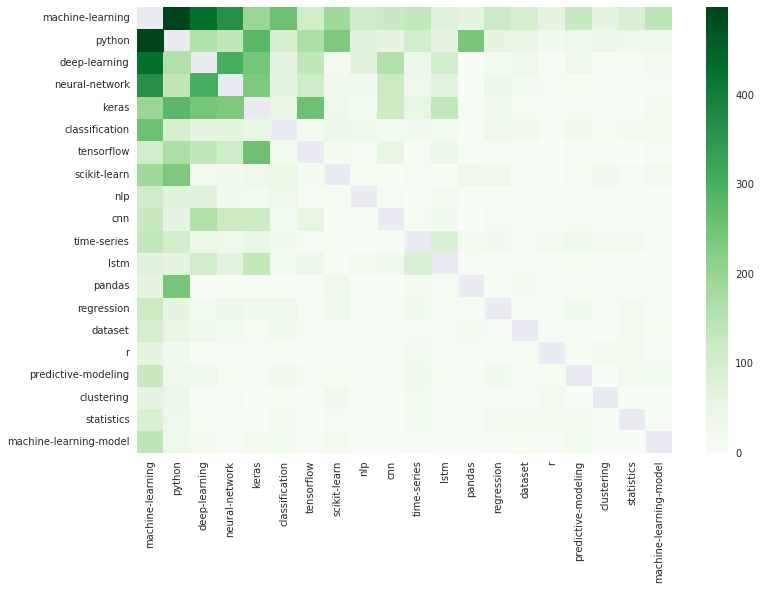

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Greens", annot=False)


We could find the most used tags are also the most viewed. Top 10 tags are: `machine-learning`, `python`, `deep-learning`, `neutral-network`, `keras`, `classification`, `tensorflow`, `scikit-learn`, `nlp` and `cnn`.

### Just a Fad?

Before we officially make our recommendation, it would be nice to solidy our findings with additional proof. More specifically, one thing that comes to mind is "Is deep learning just a fad?" Ideally, the content we decide to create will be the most useful for as long as possible. Could interest in deep learning be slowing down? Back to SEDE!

The file `all_questions.csv` holds the result of the query below — this query fetches all of the questions ever asked on DSSE, their dates and tags.

SELECT Id, CreationDate, Tags

  FROM posts
  
 WHERE PostTypeId = 1;
 
In this we will track the interest in deep learning across time. We will:

- Count how many deep learning questions are asked per time period.
- The total amount of questions per time period.
- How many deep learning questions there are relative to the total amount of questions per time period.

In [23]:
# Read the file into dataframe
all_questions = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])

# clean the tags columns
all_questions["Tags"]=all_questions["Tags"].str.replace("^<|>$","").str.split("><")

In [84]:
# define a function to classify data into two groups
# 1 has relation to deep-learning
# 0 has nothing related to deep-learning
# make a list of tags which have relations with deep-learning
def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return True
    return False

In [85]:
# apply tags column with function [class_deep_learning()]
# build a new column to store value 1 & 0
all_questions["DeepLearning"] = all_questions["Tags"].apply(
    class_deep_learning)

In [86]:
all_questions.sample(5)

,Id,CreationDate,Tags,DeepLearning,Quarter
4867,57497,2019-08-13 12:53:29,"[optimization, gradient-descent, regularization]",False,19Q3
9038,60251,2019-09-16 01:42:20,"[machine-learning, svm, math]",False,19Q3
17468,53921,2019-06-17 05:23:47,"[text-mining, natural-language-process]",False,19Q2
9012,41425,2018-11-19 18:24:54,"[neural-network, keras, regularization]",True,18Q4
10568,51109,2019-04-29 11:49:06,"[machine-learning, data-mining, data]",False,19Q2


In [88]:
deep_learning_count = all_questions["DeepLearning"].sum()
print(deep_learning_count)

7650


There're 7650 tags are related to deep learning.

The data-science-techonology landscape isn't something as dynamic to merit daily, weekly, or even monthly tracking. Let's track it quarterly.

Since we don't have all the data for the first quarter of 2020, we'll get rid of those dates:

In [27]:
# keep questions earlier than year 2020
all_questions = all_questions[
    all_questions["CreationDate"].dt.year<2020]

In [101]:
# build a function to return format like 19Q2 according to 
# CreationDate column
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = (datetime.month - 1)//3+1
    return "{}Q{}".format(year,quarter)

all_questions["Quarter"] = all_questions["CreationDate"].apply(fetch_quarter)

In [102]:
all_questions.head(5)

,Id,CreationDate,Tags,DeepLearning,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",True,19Q1
1,45418,2019-02-12 00:50:39,[neural-network],True,19Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",False,19Q1
3,45426,2019-02-12 04:51:49,[keras],True,19Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",False,19Q1


In [121]:
# separate data by Quarter and apply functions of aggregation & size
# rename column names for better understanding
# generate a ratio so we could easily see the trend
quarterly = all_questions.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})
quarterly.columns = ['DeepLearning Questions', 'Total Questions']
quarterly["DeepLearning Rate(%)"] = round(quarterly["DeepLearning Questions"]/quarterly["Total Questions"]*100,2)

quarterly

,DeepLearning Questions,Total Questions,DeepLearning Rate(%)
Quarter,,,
14Q2,9.0,157,5.73
14Q3,13.0,189,6.88
14Q4,21.0,216,9.72
15Q1,18.0,190,9.47
15Q2,28.0,284,9.86
15Q3,45.0,311,14.47
15Q4,66.0,382,17.28
16Q1,110.0,516,21.32
16Q2,109.0,518,21.04


The popularity of deep learning increases rapidly since 2015, the peak lies in 2018Q1 which 45.37% of posts are discussing about this subject. Although the percentage declines a little bit, it still holds about 40% which is amazing number.

We couldn't make a conclusion if deep learning just a fad because it shows popularity never disappear based on available data. We could make a list maybe 5 or 10 years later and we can have a conclusion if this is just a fad. Maybe we'll h